# Research name

## Intro

### Task

Домашка от себя в заметках + https://lab.karpov.courses/learning/3/module/9/lesson/149/490/3108/

### Imports

In [1]:
# BASIC LIBS

# data
import pandas as pd
import numpy as np

# stat significance
import scipy as sp

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [2]:
# JUPYTER CONFIG
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Config

## Data

### Load

In [3]:
df_1 = pd.read_csv('./data/HW_train_main_data.csv')

In [4]:
df_2 = pd.read_csv('./data/HW_train_additional_data.csv')

### Preprocessing

In [5]:
df = (
    df_1
    .set_index('id')
    .join(
        df_2.set_index('id'),
        on = 'id',
        how = 'left'
    )
    .reset_index()
)

## Research

### EDA

#### Distributions 

Distributions of the main variables  

Goal:  
-  to see with what kind of data are we dealing with: is it only old flats? only cheap ones or we have some luxury ones? New or Used apartments? Floor range? etc..

It helps to make future analysis more efficient and meaningful

In [26]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04,29000.000000,29000.000000,29000.000000,29000.000000,15253.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06,84061.314690,0.118992,4.065586,4.704483,1190.744247,1.320862,0.138966,6.641483,2.896690,0.289034,4.207276,8.299793,13.337734,5.717121,3.895103,0.588172,0.005069,0.069862
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06,57811.852151,0.118791,2.991184,3.441177,1057.236330,1.492251,0.444746,6.583770,3.292433,1.518593,4.750353,23.649913,15.986055,11.520025,11.358709,2.178019,0.071017,0.385272
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05,2546.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06,21819.000000,0.019509,2.000000,2.000000,520.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06,83502.000000,0.072158,4.000000,5.000000,990.000000,1.000000,0.000000,5.000000,2.000000,0.000000,3.000000,2.000000,8.365000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06,122862.000000,0.195781,6.000000,7.000000,1786.000000,2.000000,0.000000,10.000000,4.000000,0.000000,6.000000,5.000000,19.920000,5.760000,3.000000,0.000000,0.000000,0.000000
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08,247469.000000,0.521867,13.000000,14.000000,4849.000000,6.000000,3.000000,29.000000,16.000000,10.000000,23.000000,141.000000,100.000000,98.770000,120.000000,17.000000,1.000000,9.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

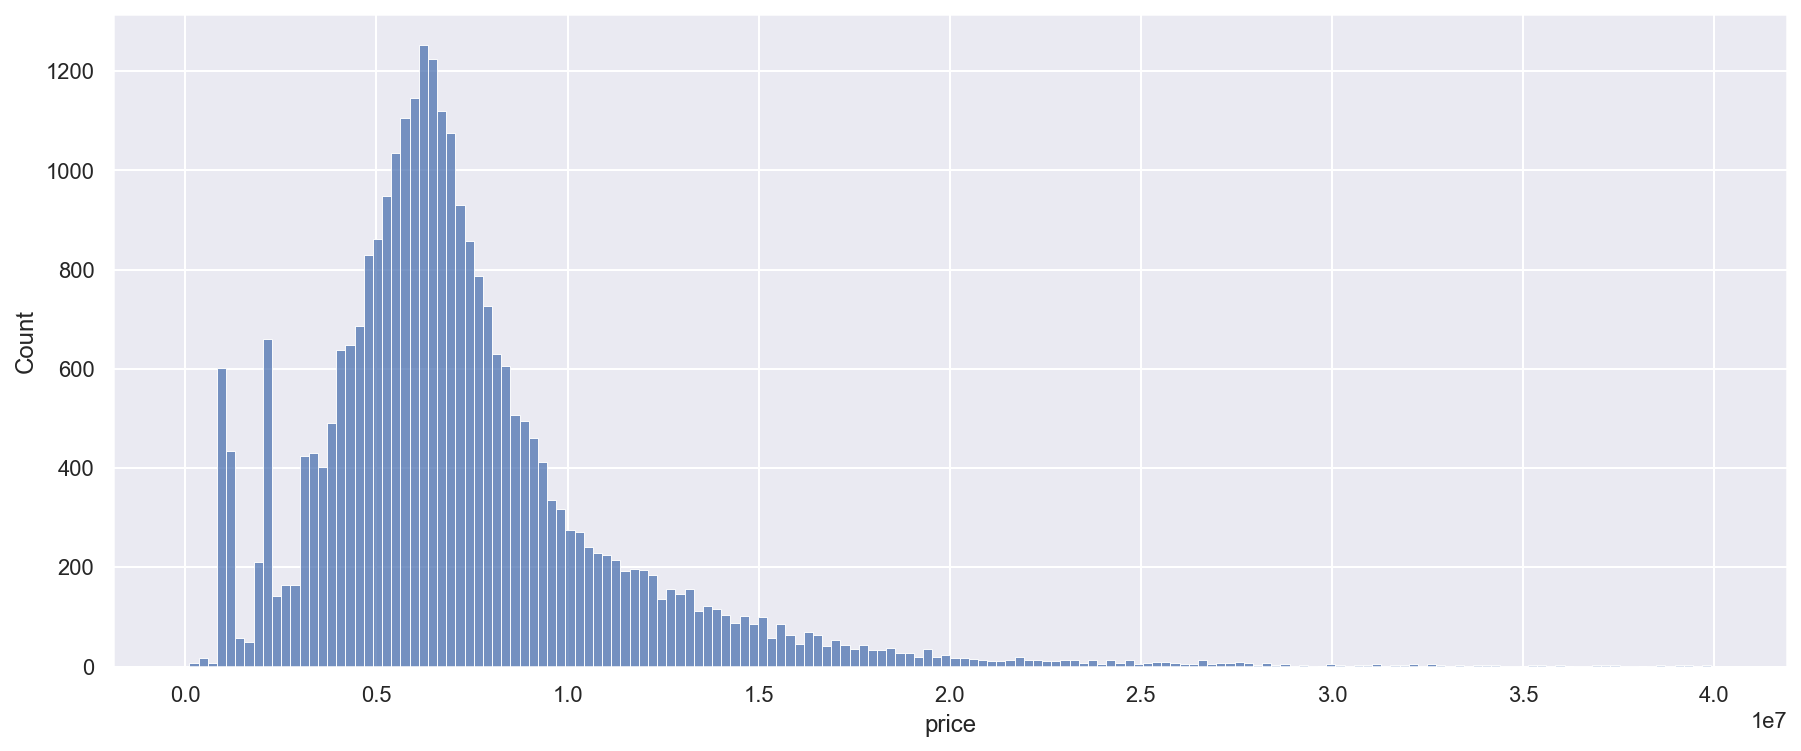

In [38]:
plt.figure(figsize=(15, 6))
sns.histplot(
    data = df.query('price < 40000000'),
    x = 'price'
)

В целом имеем дело с квартирами разных ценовых диапазонов. Само распределение цен нормальное, есть только аномально большое количество квартир за 1-2 миллиона.  
Также стоит отметить, что имеется и длинных хвост. Есть и квартиры за 50-100 млн рублей.

<AxesSubplot:xlabel='build_year', ylabel='Count'>

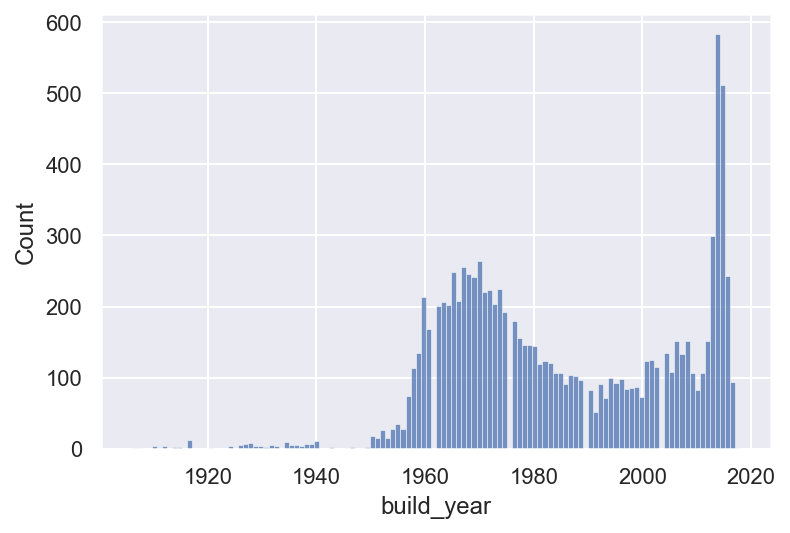

In [45]:
sns.histplot(
    data = df.query('build_year > 1900 and build_year < 2020').sample(10000),
    x = 'build_year',
    bins = 120
)

Есть года, по которым нету данных ни за одну квартиру. Таких пропусков 4 с периодом в 15-20 лет  

Видим всплеск квартир свежей постройки. БОльше квартир строят, больше данных по ним => у нас оч мало данных по жилью 20 века?  

Видим 2 моды. На жилье в 60-70х и на жилье в 2010-х. Там основное число выложенных квартир  

Имеем также немало оч старых зданий. Есть здания 1910-х годов

<AxesSubplot:xlabel='full_sq', ylabel='Count'>

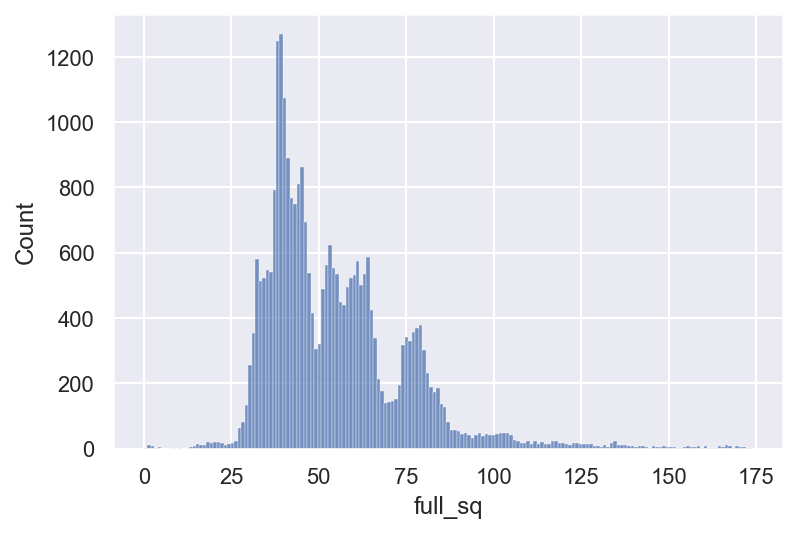

In [49]:
sns.histplot(
    data = df.query('full_sq < 175'),
    x = 'full_sq',
    bins = 175
)

Больше всего квартира прмерно 40 метров. Но в целом моды 3: 40, 60 и 80. Скорее всего соответствуют основным стандартам 1, 2х и 3х комнатных квартир. Есть и квартира 120+ метров

[(0.0, 30.0)]

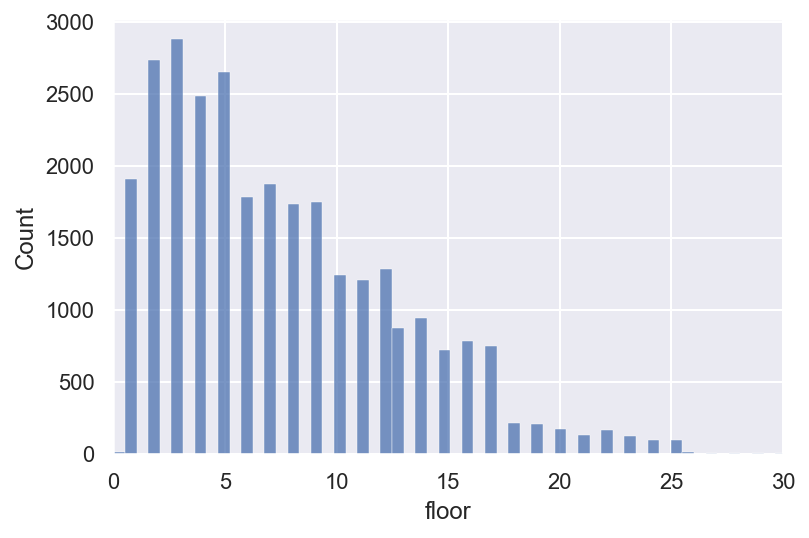

In [62]:
sns.histplot(
    data = df,
    x = 'floor'
).set(xlim=(0, 30))

Можешь жить хоть на 25 этаже. Но небоскребов у нас нету(

#### Pairplot 

Basic pairplot to see what correlations do we have and maybe spot the most interesting ones, that I'd want to analise more deeply (for example - extremum/inflection points, anomalies)

Goal:  
-  to see with what kind of data are we dealing with: is it only old flats? only cheap ones or we have some luxury ones? New or Used apartments? Floor range? etc..

It helps to make future analysis more efficient and meaningful

In [6]:
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'price', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities'],
      dtype='object')

In [24]:
cols = [
        'full_sq', 'floor', 'material', 'build_year', 
        'num_room', 'apartment condition',
       'school_facilities', 'healthcare_facilities',
        'cafe_count',
        'price'
       ]
df[cols].head(1)

,full_sq,floor,material,build_year,num_room,apartment condition,school_facilities,healthcare_facilities,cafe_count,price
0,60,6.0,1.0,1974.0,3.0,3.0,5,1,0,9711800.0


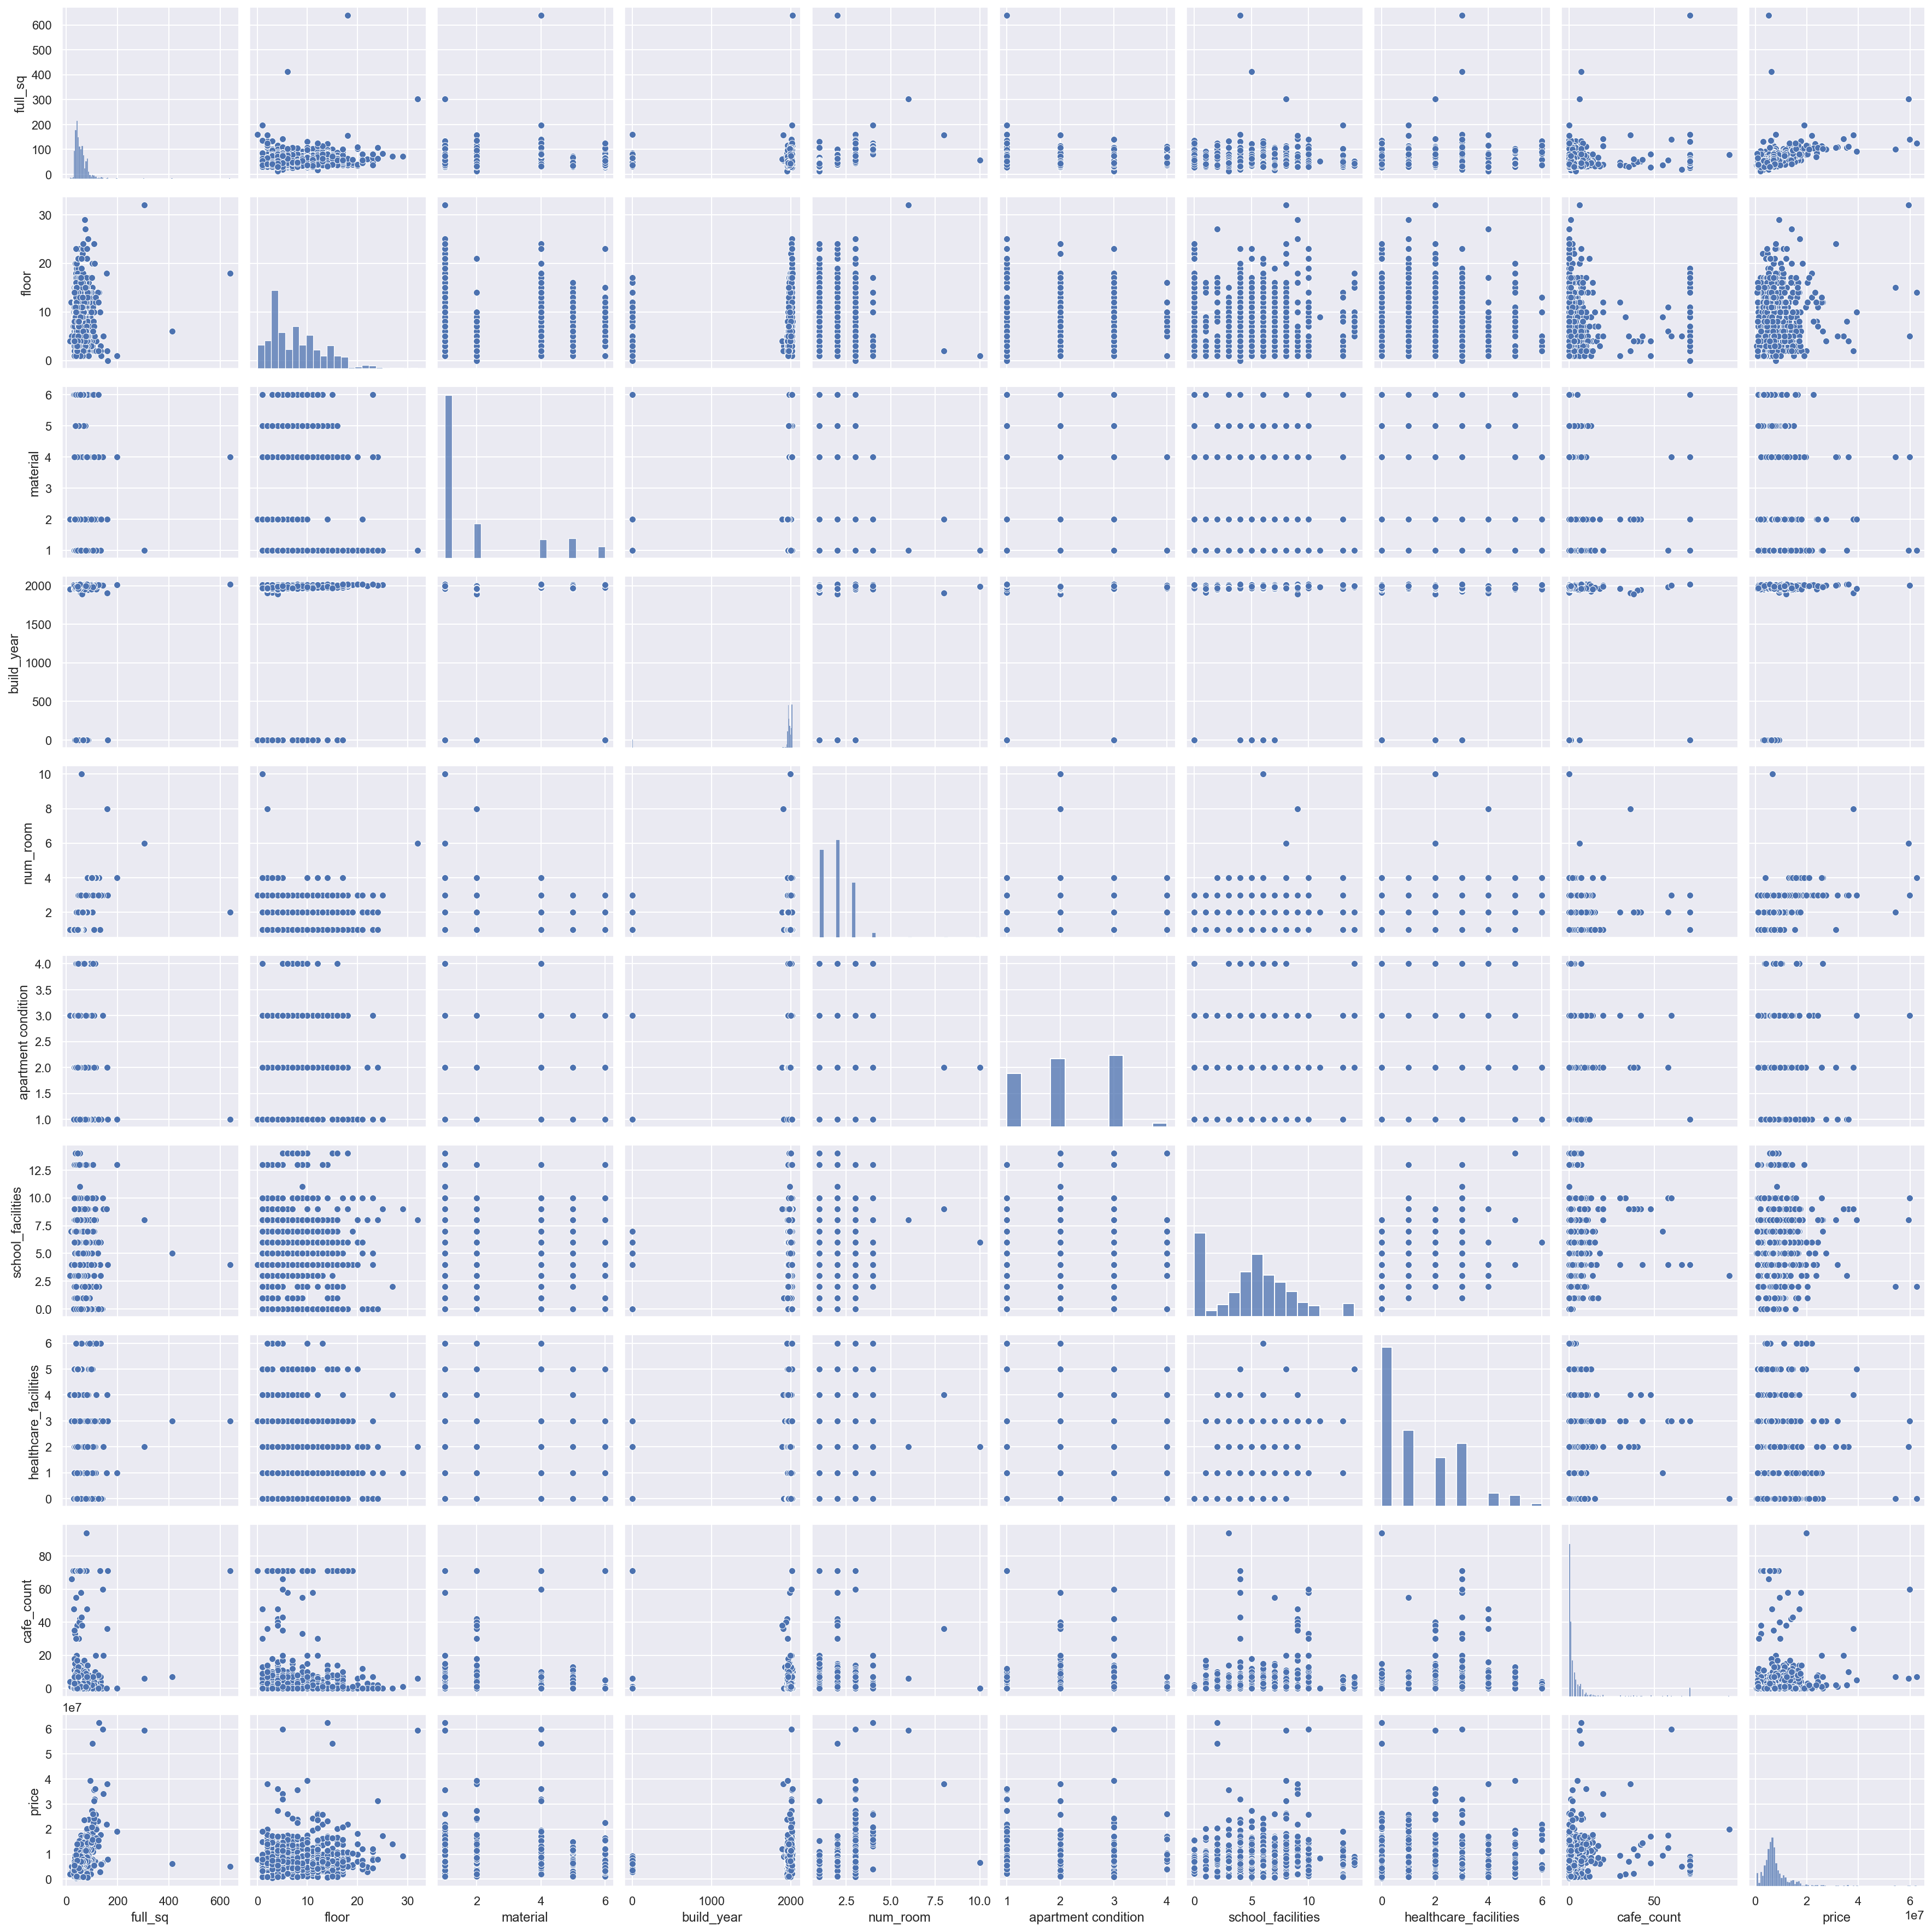

In [22]:
sns.pairplot(df[cols].sample(1000))

#### Scatter plots

<AxesSubplot:xlabel='full_sq', ylabel='price'>

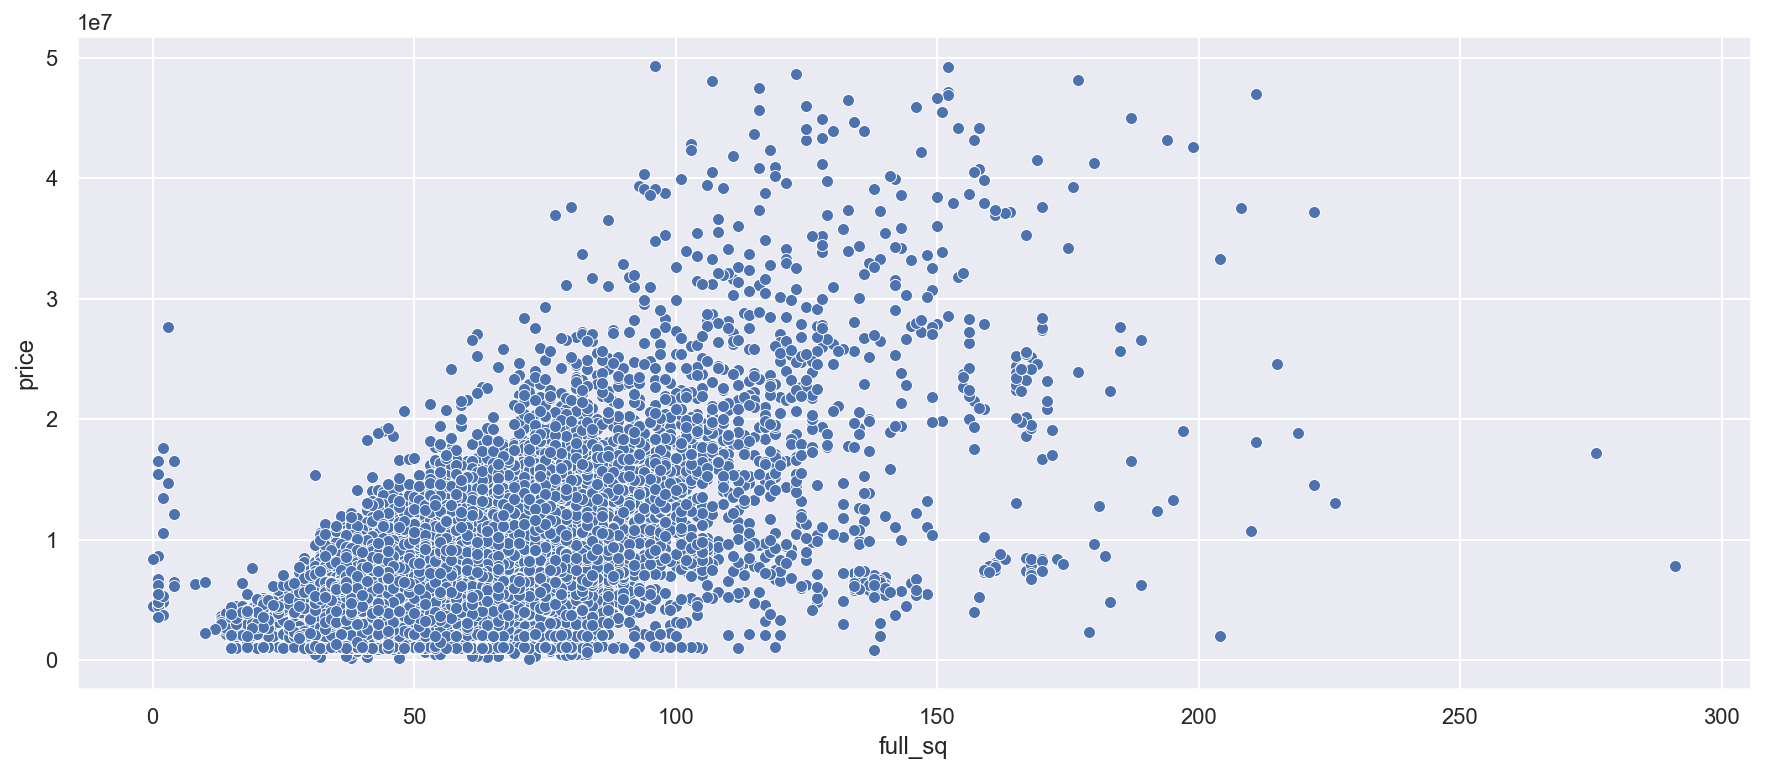

In [103]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data = df.query('full_sq < 300 and price < 50000000'),
    x = 'full_sq',
    y = 'price',
    alpha=1
)


<AxesSubplot:xlabel='full_sq', ylabel='price'>

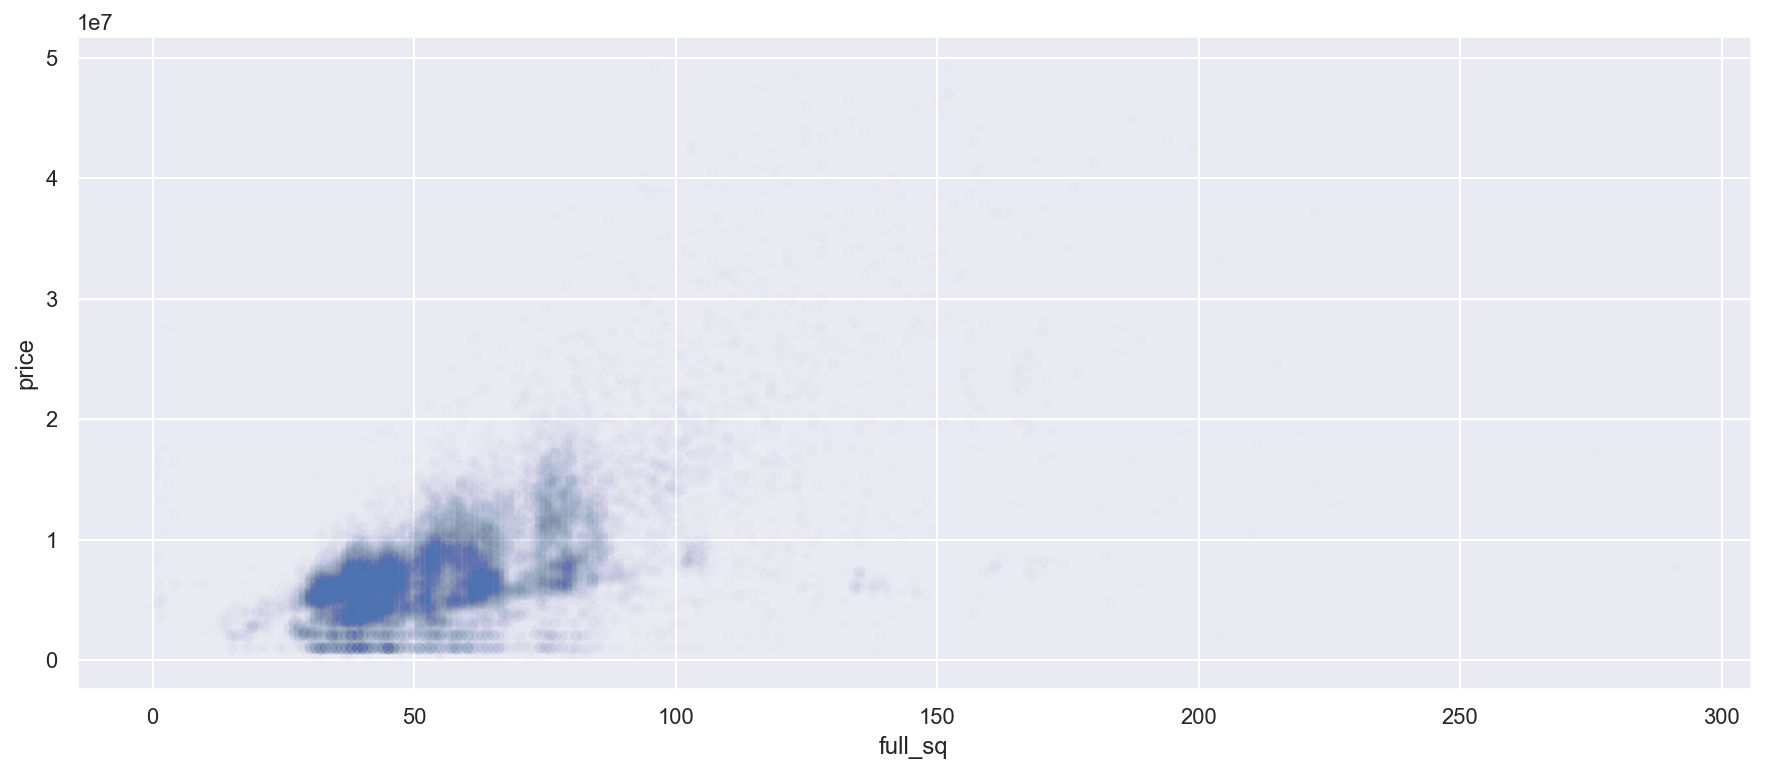

In [105]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data = df.query('full_sq < 300 and price < 50000000'),
    x = 'full_sq',
    y = 'price',
    alpha=0.01
)

Дорогой сегмент квартир с ростом метража растет в цене быстрее, чем с ростом метража растут бюджетные квартиры. 

При предсказании можно делать дамми переменную дорогая ди хата (по цене за метр анпример) и разделять коэффициент роста цены

<AxesSubplot:xlabel='build_year', ylabel='price'>

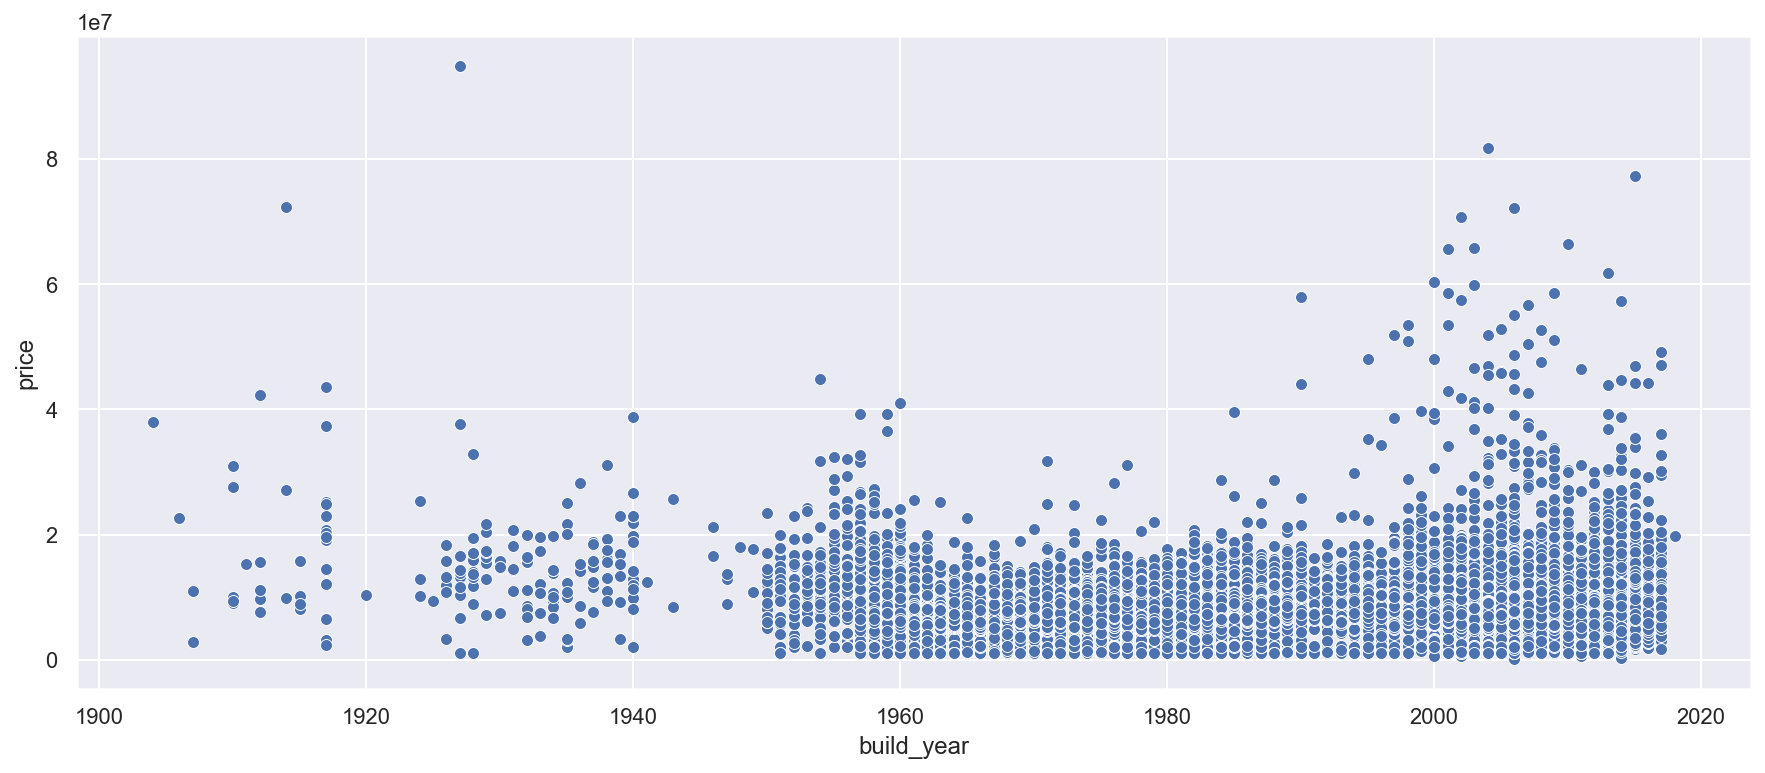

In [109]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data = df.query('build_year < 2030 and build_year > 1900'),
    x = 'build_year',
    y = 'price',
    alpha=1
)


Почти все дорогие квартиры - новострой  
Есть оч дорогая 30х годов. 50-90е - почти без супер дорогих квартир, видимо тут тупа типовая застройка была и совсем не было вариантов лакшери (хотя по идее были)

<AxesSubplot:xlabel='cafe_count', ylabel='price'>

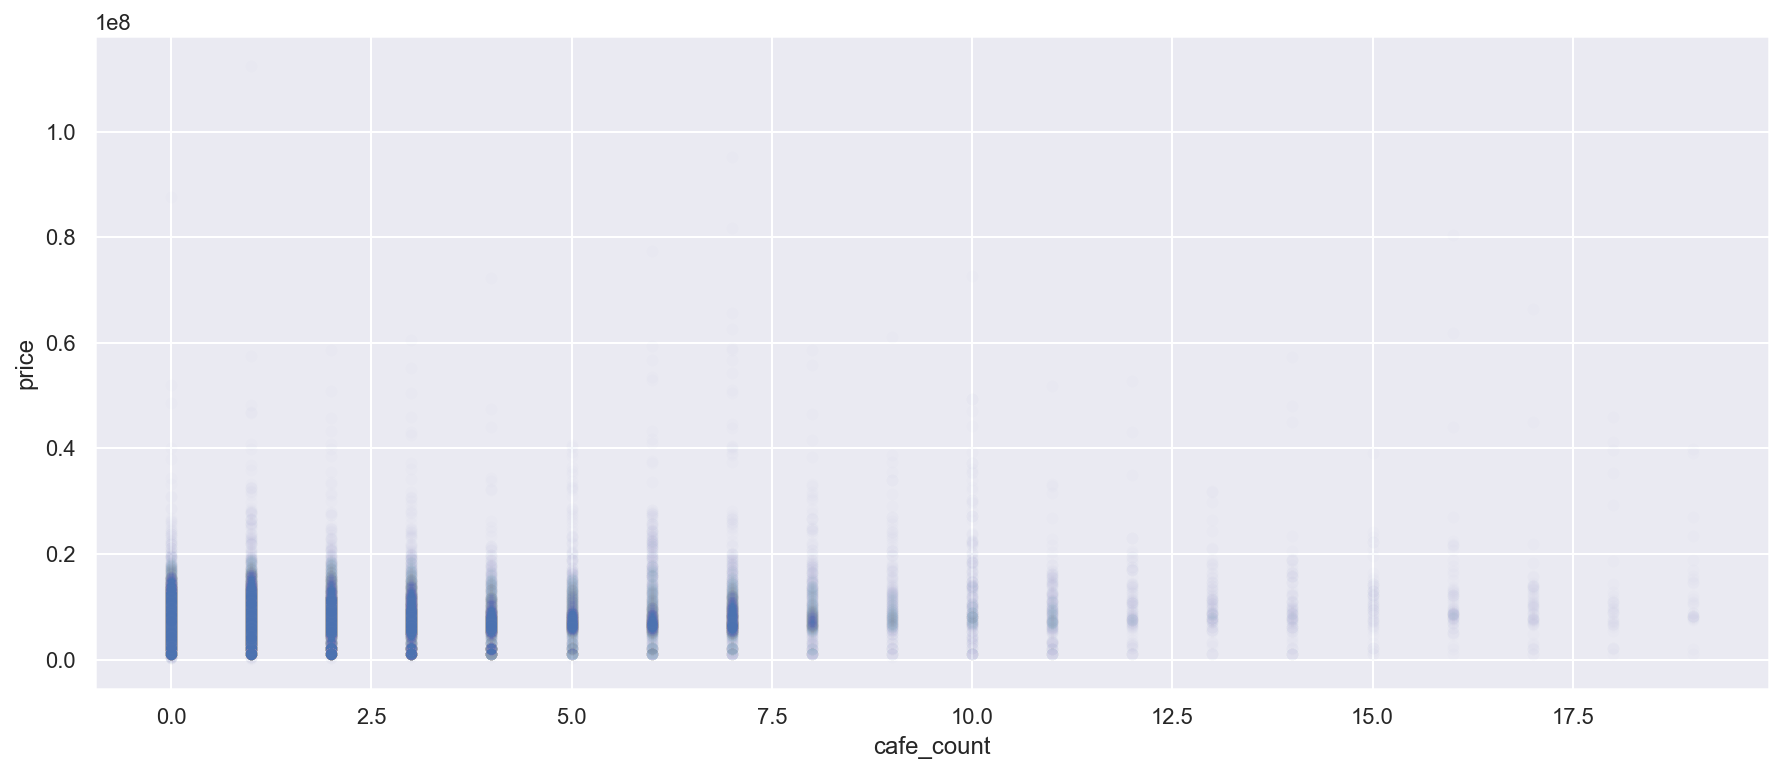

In [118]:
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data = df.query('cafe_count < 20'),
    x = 'cafe_count',
    y = 'price',
    alpha=0.01
)


#### Boxplots

[(0.0, 80000000.0)]

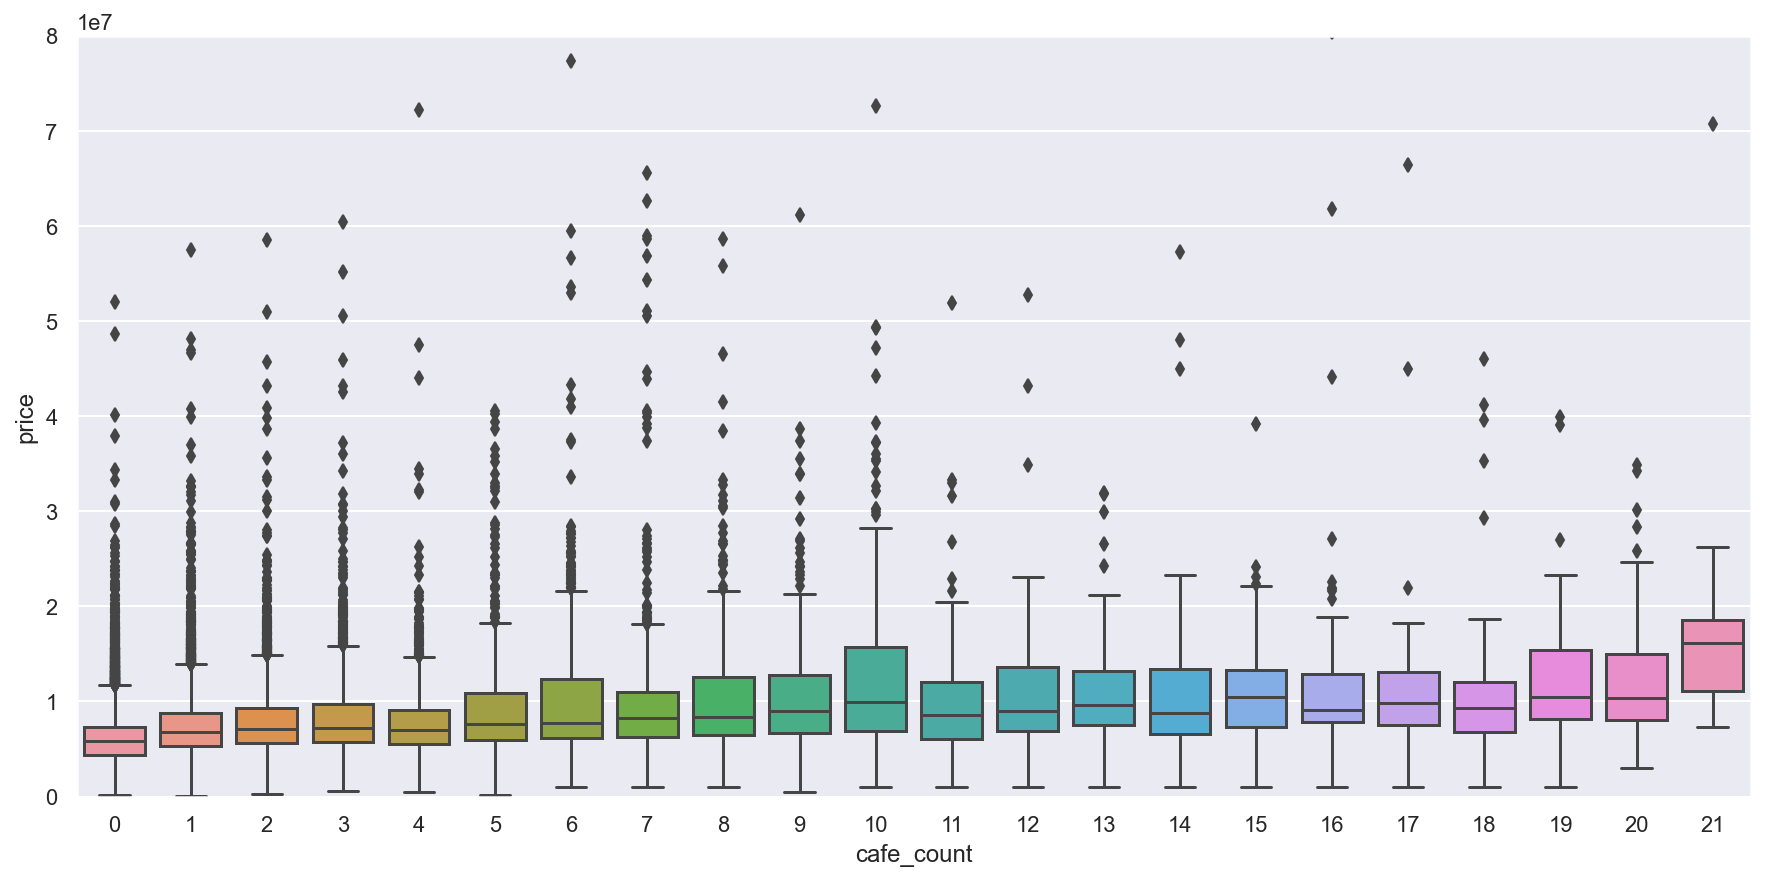

In [140]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    data = df.query('cafe_count < 22'),
    x = 'cafe_count',
    y = 'price'
).set(ylim = (0, 80000000))

Boxplot - как минимум крутая замена скаттер плоту и барплоту, при плоттинге категорияльных переменных  

Барплот норм, если тупа среднего будет достаточно. Но для анализу лучше всегда ебашить боксплот, так как тут тебе все распределение опишут и тренды тоже покажет.  

Тренд на возрастание цены, в районах где кафешек больше, который четко можно увидеть на бокплоте, вообще не было видно на скаттер плоте. Но боксплот в целом показал бы тоже, плюс он бы показал доверительные интервалы, которые удобны чтобы понимать соклько там данных и соответственно точность оценок. А куча информации на бокмплоте немного непонятно зачем. Достаточно изначально распредлеение посмотреть и понимание будет, ну хз

[(0.0, 30000000.0)]

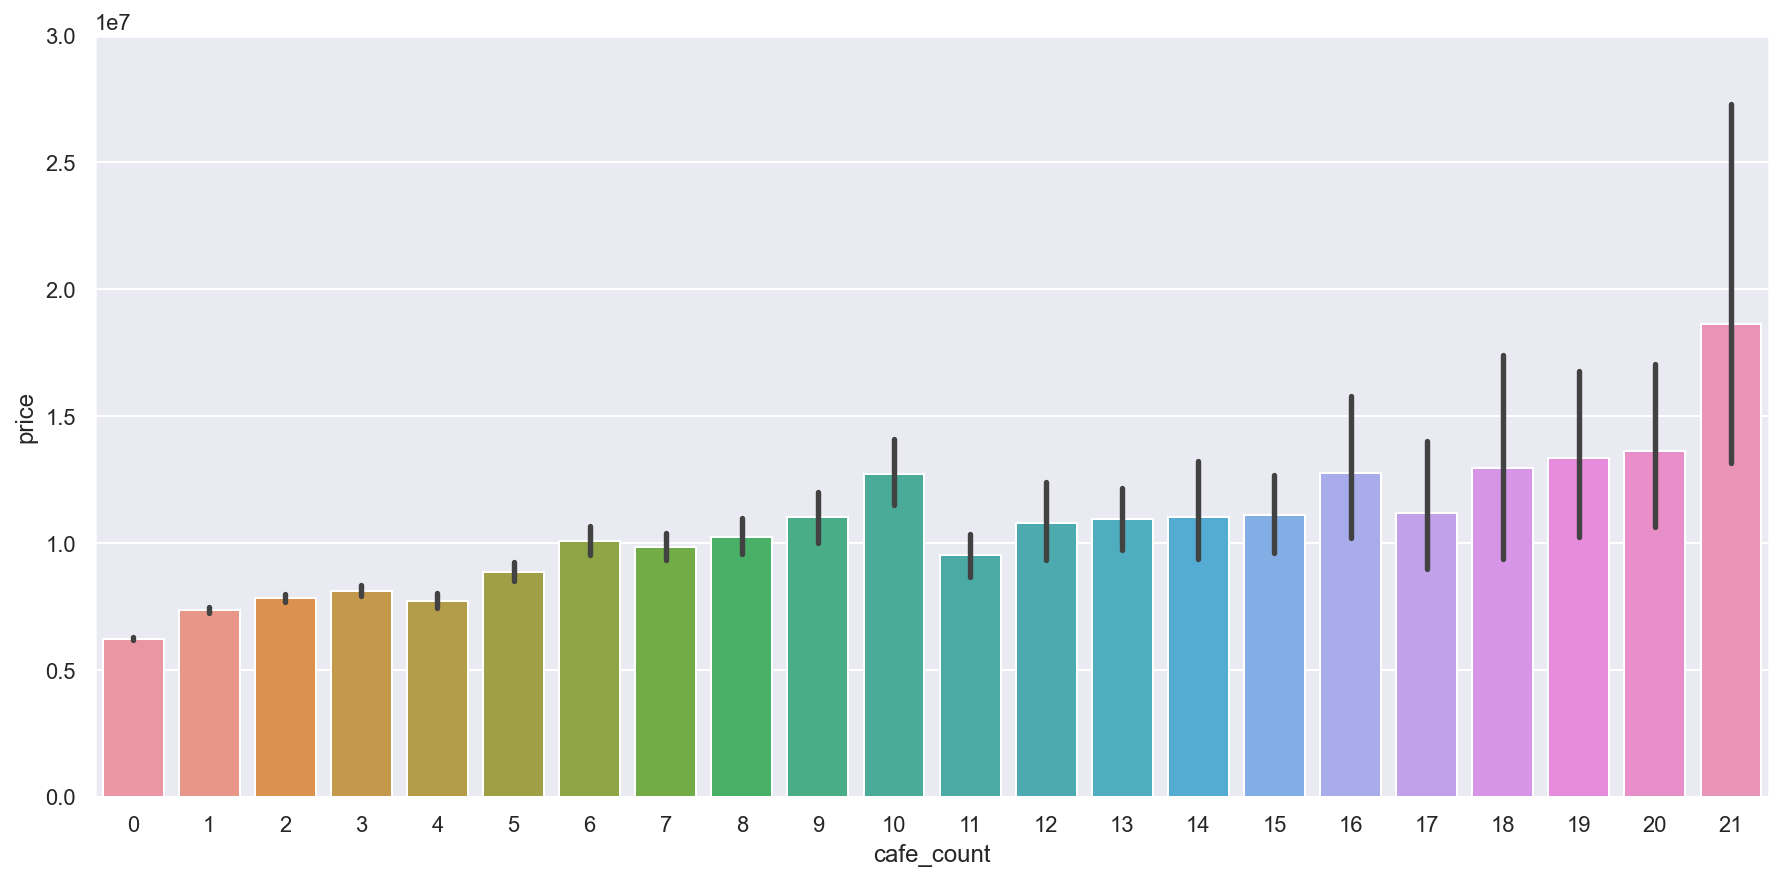

In [137]:
plt.figure(figsize=(15, 7))
sns.barplot(
    data = df.query('cafe_count < 22'),
    x = 'cafe_count',
    y = 'price'
).set(ylim = (0, 30000000))

<AxesSubplot:xlabel='cafe_count', ylabel='count'>

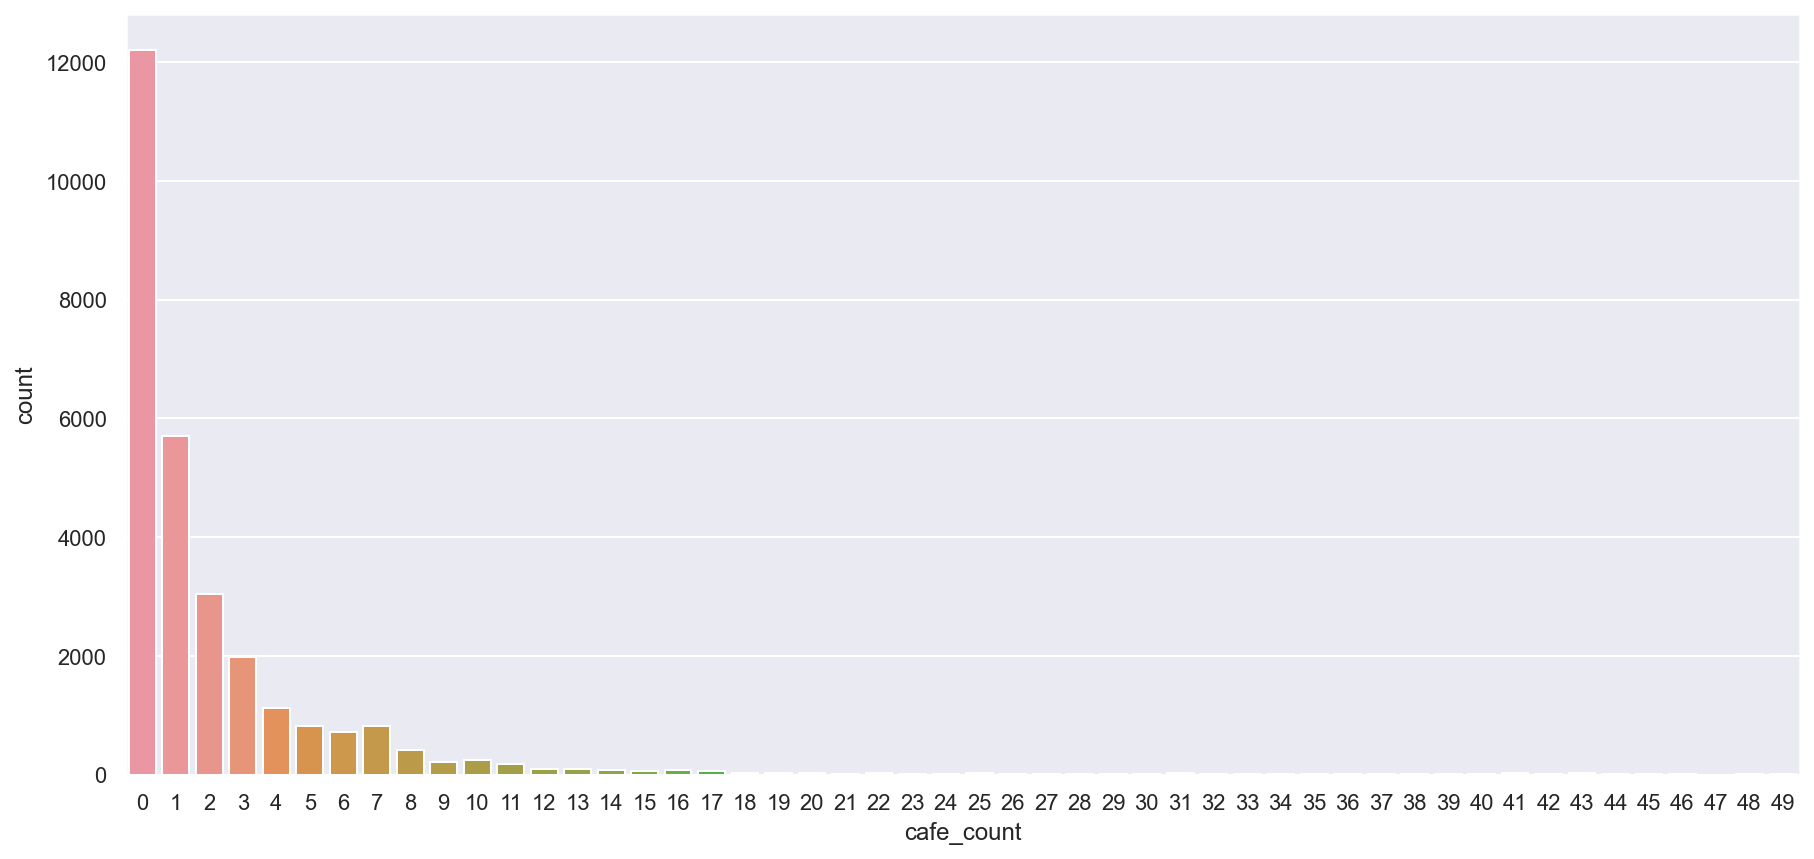

In [129]:
plt.figure(figsize=(15, 7))
sns.countplot(
    data = df.query('cafe_count < 50'),
    x = 'cafe_count'
)

### Modelling

### Post-analysis

## Other

### 